In [1]:
# ---------------- importing reduced LAICPMS data files

    # - LAICPMS data processed using SILLS for data reduction

# --- import modules

import os
import glob
import pandas as pd
import math
import numpy as np
import plotly.express as px


# --- set working directory

base_dir = ".DATA/LA-ICP-MS/"

In [2]:
# --- look into working directory and create a list with selected files - .xls
os.chdir(base_dir)
txt_files = glob.glob('*.xls')

print(txt_files)
len(txt_files)

['2021_08_25-test.xls', '2021_11_29-AM.xls', '2021_11_29-PM1.xls', '2021_11_29-PM2.xls', '2021_11_30-AM.xls', '2021_11_30-AM2.xls', '2021_11_30-PM.xls', '2021_11_30-PM2.xls', '2021_12_01-AM.xls', '2021_12_01-PM.xls', '2021_12_01-PM2.xls']


11

In [36]:
# --- create a single dataframe with all files in the list

df_raw = pd.DataFrame()

    # -- loop in the file list, get relevant data and append to combined dataframe
for file in txt_files:
    print(file)
    df = pd.read_excel(file, skiprows = (0,1,2,3,4,5,6,7,9), na_values=None) #skiprows in the start of the file, before actual data
    blank_df = df.loc[df.isnull().all(1)] #creates a dataframe showing where blank lines are located

        # - here is a condition to remove everything after the relevant data (multidata input file, only first part is required)
    if len(blank_df) > 0: #check if there are indeed blank lines in the df
        first_blank_index = blank_df.index[0]  #locate index of first blank line
        df = df[:first_blank_index]  #filters data from start of dataframe up to the first blank line
    
    df_raw = pd.concat((df_raw,df),sort=False,ignore_index = True)
    

    
df_raw = df_raw.rename(columns={"Sample": "sample", "Piece": "piece", "Field": "field", "Analysis": "analysis"})

df_raw

2021_08_25-test.xls
2021_11_29-AM.xls
2021_11_29-PM1.xls
2021_11_29-PM2.xls
2021_11_30-AM.xls
2021_11_30-AM2.xls
2021_11_30-PM.xls
2021_11_30-PM2.xls
2021_12_01-AM.xls
2021_12_01-PM.xls
2021_12_01-PM2.xls


,sample,piece,field,analysis,Host,Time,Info,Li7,B11,Na23,...,Fe56,Fe57,Rb85,Sr88,Nb93,Sn118,Cs133,Ba137,Ta181,W182
0,20,B,4.0,1,bertossaite,14:36:00,NaN,<8.1678,243.017826,44286.873509,...,380.788387,<134.2921,798.763019,NaN,<0.089087,<4.4638,571.702701,NaN,<0.38684,<1.4856
1,20,B,4.0,2,bertossaite,14:41:00,NaN,4364.129983,283.372066,40731.651892,...,<170.9541,<310.2672,771.347476,NaN,<0.48308,<10.8423,706.986291,NaN,<0.89823,<4.1129
2,20,B,4.0,3b,bertossaite,14:49:00,NaN,6460.774841,236.260499,35981.020799,...,1071.500697,559.03085,745.991087,NaN,<0.31016,<7.8353,535.075053,NaN,<0.66429,<1.9577
3,20,J,1.0,1,trolleite,14:11:00,NaN,434.836112,2855.375827,37825.239581,...,3666.43071,862.006039,1900.347217,NaN,1.233901,9.757163,1143.178165,NaN,9.76354,15.726706
4,20,J,1.0,2b,trolleite,14:16:00,NaN,178.412401,1573.511157,36780.957507,...,<491.3925,<826.9806,1311.715072,NaN,<1.007,<28.6566,545.693152,NaN,<1.6585,<11.6703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,19(2),C,2,wyl,wyllieite,16:24:00,Wyl-matrix,<2.7868,<14.9017,63123.179629,...,113561.695469,94236.435981,<0.39905,1.623696,0.070576,<1.3492,<0.43114,<0.64908,<0.19826,1.02802
164,19,E,11b,3,quartz,16:06:00,NaN,8139.744285,<1131.2472,36895.330495,...,21750.053796,11944.60507,1293.324711,367.649885,<12.5783,<114.3945,111.557053,936.884638,<22.7527,<95.5103
165,19,E,11b,4,quartz,16:10:00,NaN,<116.2199,1602.664237,43288.551278,...,1539.850901,<1580.1095,1596.468023,278.828777,18.621208,151.316832,274.385185,135.987287,<10.3592,162.805301
166,4,C,8,4,trolleite,16:45:00,2shots,3160.320899,1451.754807,29383.474629,...,1266.046399,<667.382,2713.85015,<3.1026,2.093393,<25.7419,488.197384,<29.6833,<3.8746,<16.6224


In [37]:
df_data = df_raw.drop(['sample', 'piece', 'field', 'analysis', 'Host', 'Time', 'Info'], axis=1)

#separate data from metadata - only do calculation in data afterwards
df_metadata = df_raw[['sample', 'piece', 'field', 'analysis', 'Host', 'Time', 'Info']]

#rename dataframe columns for simplification
df_data.columns = ['Li', 'B', 'Na', 'Mg', 'Al', 'Si','P', 'K', 'Ca43','Ca44', 
                       'Ti', 'Mn', 'Fe56', 'Fe57', 'Rb', 'Sr', 'Nb', 'Sn','Cs', 'Ba', 'Ta', 'W']

print(df_data.columns)

df_data

Index(['Li', 'B', 'Na', 'Mg', 'Al', 'Si', 'P', 'K', 'Ca43', 'Ca44', 'Ti', 'Mn',
       'Fe56', 'Fe57', 'Rb', 'Sr', 'Nb', 'Sn', 'Cs', 'Ba', 'Ta', 'W'],
      dtype='object')


,Li,B,Na,Mg,Al,Si,P,K,Ca43,Ca44,...,Fe56,Fe57,Rb,Sr,Nb,Sn,Cs,Ba,Ta,W
0,<8.1678,243.017826,44286.873509,<1.3586,<7.6038,NaN,19621.767193,17304.44194,<2093.9036,<787.0589,...,380.788387,<134.2921,798.763019,NaN,<0.089087,<4.4638,571.702701,NaN,<0.38684,<1.4856
1,4364.129983,283.372066,40731.651892,<2.4529,<17.9401,NaN,28551.259407,12733.89934,<4745.4249,<1848.0081,...,<170.9541,<310.2672,771.347476,NaN,<0.48308,<10.8423,706.986291,NaN,<0.89823,<4.1129
2,6460.774841,236.260499,35981.020799,26.107586,<13.9121,NaN,18063.733313,18817.427948,3784.027315,2765.706974,...,1071.500697,559.03085,745.991087,NaN,<0.31016,<7.8353,535.075053,NaN,<0.66429,<1.9577
3,434.836112,2855.375827,37825.239581,1496.743447,<13.5197,NaN,19153.614296,31943.847324,<3943.1651,<1431.7765,...,3666.43071,862.006039,1900.347217,NaN,1.233901,9.757163,1143.178165,NaN,9.76354,15.726706
4,178.412401,1573.511157,36780.957507,206.10789,<43.8831,NaN,<1410.4975,36383.554954,<12348.5107,<4531.7175,...,<491.3925,<826.9806,1311.715072,NaN,<1.007,<28.6566,545.693152,NaN,<1.6585,<11.6703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,<2.7868,<14.9017,63123.179629,2901.537923,41173.872107,760.21364,120134.277192,73.471986,4276.485199,4185.040749,...,113561.695469,94236.435981,<0.39905,1.623696,0.070576,<1.3492,<0.43114,<0.64908,<0.19826,1.02802
164,8139.744285,<1131.2472,36895.330495,872.964919,90889.421741,<23673.358,62522.700636,21365.653601,75412.037448,71596.418822,...,21750.053796,11944.60507,1293.324711,367.649885,<12.5783,<114.3945,111.557053,936.884638,<22.7527,<95.5103
165,<116.2199,1602.664237,43288.551278,12965.476511,14864.742036,<13933.6769,<2743.4184,30061.625403,<27324.135,<12370.5121,...,1539.850901,<1580.1095,1596.468023,278.828777,18.621208,151.316832,274.385185,135.987287,<10.3592,162.805301
166,3160.320899,1451.754807,29383.474629,498.86357,<45.2691,<6158.0215,89935.335895,45553.496975,<11018.9869,<5382.4929,...,1266.046399,<667.382,2713.85015,<3.1026,2.093393,<25.7419,488.197384,<29.6833,<3.8746,<16.6224


In [38]:

df_reference = pd.read_csv('./DATA/_Oxides_mass.csv', 
                    encoding = "ANSI", 
                   index_col = 0)


df_reference.columns = ['H', 'Li', 'Be', 'B', 'C', 'F', 'Na', 'Mg', 'Al',
       'Si', 'P', 'S', 'Cl', 'K', 'Ca', 'Sc', 'Ti', 'Ti2O3',
       'V', 'Cr', 'Mn', 'Fe2O3', 'Fe', 'Ni', 'Co', 'Cu', 'Zn',
       'Ga', 'Ge', 'As', 'Rb', 'Sr', 'Y', 'Zr', 'Nb',
       'Mo', 'Sn', 'Sb', 'Cs', 'Ba', 'La', 'Ce', 'Ce2O3',
       'Pr', 'Nd', 'Sm', 'Eu', 'EuO', 'Gd', 'Tb', 'Dy',
       'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'W',
       'Au', 'Pb', 'Th', 'U']


reference_oxides = df_reference[(df_reference.columns) & (df_data.columns)]



    # --- create an array with molecular weights of oxides
    
molar_mass = reference_oxides.iloc[4,:]



print(reference_oxides.columns, len(reference_oxides.columns), '\n\n', molar_mass)

reference_oxides

Index(['Li', 'B', 'Na', 'Mg', 'Al', 'Si', 'P', 'K', 'Ti', 'Mn', 'Rb', 'Sr',
       'Nb', 'Sn', 'Cs', 'Ba', 'Ta', 'W'],
      dtype='object') 18 

 Li      6.94070
B      10.80910
Na     22.98947
Mg     24.30440
Al     26.98064
Si     28.08480
P      30.97226
K      39.09770
Ti     47.89880
Mn     54.93740
Rb     85.46750
Sr     87.61940
Nb     92.90490
Sn    118.68880
Cs    132.90510
Ba    137.33940
Ta    180.94640
W     183.85000
Name: Atom_wt, dtype: float64


C:\Users\u0125722\anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  app.launch_new_instance()


,Li,B,Na,Mg,Al,Si,P,K,Ti,Mn,Rb,Sr,Nb,Sn,Cs,Ba,Ta,W
Oxide,,,,,,,,,,,,,,,,,,
Mol_wt,29.88140,69.618200,61.978940,40.304400,101.961280,60.084800,141.944520,94.195400,79.898800,70.937400,186.935000,103.619400,265.809800,150.68880,281.810200,153.33940,441.892800,231.850
Conv_Factor,0.46457,0.310551,0.741857,0.603036,0.529251,0.467439,0.436421,0.830147,0.599508,0.774457,0.914412,0.845595,0.699044,0.78765,0.943226,0.89566,0.818967,0.793
Ox,1.00000,3.000000,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,2.000000,1.000000,1.000000,1.000000,5.000000,2.00000,1.000000,1.00000,5.000000,3.000
Cat,2.00000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.00000,2.000000,1.00000,2.000000,1.000
Atom_wt,6.94070,10.809100,22.989470,24.304400,26.980640,28.084800,30.972260,39.097700,47.898800,54.937400,85.467500,87.619400,92.904900,118.68880,132.905100,137.33940,180.946400,183.850


In [39]:
df_data_bdl = df_data.copy()

#replace values starting with "<" (i.e. below detection limit) to value/sqrt(value)
#replace negative values with 0
# for col_name, col_values in df_data_bdl.iteritems():
#     for index, value in enumerate(col_values):
#         if type(value) is str:
#             value = value.replace('<', '')
#             value = float(value)
#             if value < 0:
#                 df_data_bdl[col_name][index] = 0
#             else:
#                 df_data_bdl[col_name][index] = (value/(math.sqrt(2)))
#         elif value < 0:
#             df_data_bdl[col_name][index] = 0    
            
            
df_data_bdl = df_data.replace({'<': np.nan},regex=True)
df_data_bdl[df_data_bdl < 0] = np.nan


#add columns in the dataframe using iloc characters
df_data_bdl["Ca"] = df_data_bdl['Ca43'] + df_data_bdl['Ca44']
df_data_bdl["Fe"] = df_data_bdl['Fe56'] + df_data_bdl['Fe57']


df_data_bdl = df_data_bdl.drop(['Ca43','Ca44', 'Fe56', 'Fe57'], axis=1)


df_data_bdl

,Li,B,Na,Mg,Al,Si,P,K,Ti,Mn,Rb,Sr,Nb,Sn,Cs,Ba,Ta,W,Ca,Fe
0,NaN,243.017826,44286.873509,NaN,NaN,NaN,19621.767193,17304.441940,NaN,1133.525329,798.763019,NaN,NaN,NaN,571.702701,NaN,NaN,NaN,NaN,NaN
1,4364.129983,283.372066,40731.651892,NaN,NaN,NaN,28551.259407,12733.899340,NaN,134.645018,771.347476,NaN,NaN,NaN,706.986291,NaN,NaN,NaN,NaN,NaN
2,6460.774841,236.260499,35981.020799,26.107586,NaN,NaN,18063.733313,18817.427948,NaN,939.465010,745.991087,NaN,NaN,NaN,535.075053,NaN,NaN,NaN,6549.734290,1630.531547
3,434.836112,2855.375827,37825.239581,1496.743447,NaN,NaN,19153.614296,31943.847324,NaN,1468.102905,1900.347217,NaN,1.233901,9.757163,1143.178165,NaN,9.76354,15.726706,NaN,4528.436749
4,178.412401,1573.511157,36780.957507,206.107890,NaN,NaN,NaN,36383.554954,58.065345,239.827905,1311.715072,NaN,NaN,NaN,545.693152,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,NaN,NaN,63123.179629,2901.537923,41173.872107,760.21364,120134.277192,73.471986,12.268744,143938.477808,NaN,1.623696,0.070576,NaN,NaN,NaN,NaN,1.028020,8461.525948,207798.131450
164,8139.744285,NaN,36895.330495,872.964919,90889.421741,NaN,62522.700636,21365.653601,NaN,14320.529500,1293.324711,367.649885,NaN,NaN,111.557053,936.884638,NaN,NaN,147008.456270,33694.658866
165,NaN,1602.664237,43288.551278,12965.476511,14864.742036,NaN,NaN,30061.625403,2419.281000,5595.449751,1596.468023,278.828777,18.621208,151.316832,274.385185,135.987287,NaN,162.805301,NaN,NaN
166,3160.320899,1451.754807,29383.474629,498.863570,NaN,NaN,89935.335895,45553.496975,NaN,356.576277,2713.850150,NaN,2.093393,NaN,488.197384,NaN,NaN,NaN,NaN,NaN


In [40]:
def ppm_to_mol(concentration, solute):
    mol = concentration / (solute * 1000)
    return mol

# --- new dataframe with molar concentrations (measured ppm divided by molar weights * 1000)
    
df_mol = df_data_bdl.div((molar_mass*1000), axis='columns')




df_mol["NbTa"] = df_mol['Nb'] + df_mol['Ta']
df_mol["Nb/Ta"] = df_mol['Nb'] / (df_mol['Ta'].replace(0, np.nan))
df_mol["Li/Na"] = df_mol['Li'] / df_mol['Na']
df_mol["K/Na"] = df_mol['K'] / df_mol['Na']

df_mol["Na%"] = df_data_bdl['Na'] / 10000
df_mol["Li%"] = df_data_bdl['Li'] / 10000
df_mol["K%"] = df_data_bdl['K'] / 10000
df_mol["Rb%"] = df_data_bdl['Rb'] / 10000
df_mol["Cs%"] = df_data_bdl['Cs'] / 10000

df_mol["P%"] = df_data_bdl['P'] / 10000
df_mol["B%"] = df_data_bdl['B'] / 10000

df_mol["Alkalis"] = df_mol['Li'] + df_mol['Na'] + df_mol['K'] + df_mol['Rb'] + df_mol['Cs']
df_mol["Alkalis%"] = df_mol['Li%'] + df_mol['Na%'] + df_mol['K%'] + df_mol['Rb%'] + df_mol['Cs%']


#combine calculated data with metadata
df_mol[['sample', 'piece', 'field', 'analysis', 'Host', 'Time', 'Info']] = df_metadata[['sample', 'piece', 'field', 'analysis', 'Host', 'Time', 'Info']]

df_mol['Info'] = df_mol['Info'].fillna('')
# df_mol = df_mol.fillna(0.0)

df_mol

,Al,B,Ba,Ca,Cs,Fe,K,Li,Mg,Mn,...,B%,Alkalis,Alkalis%,sample,piece,field,analysis,Host,Time,Info
0,NaN,0.022483,NaN,NaN,0.004302,NaN,0.442595,NaN,NaN,0.020633,...,0.024302,NaN,NaN,20,B,4.0,1,bertossaite,14:36:00,
1,NaN,0.026216,NaN,NaN,0.005319,NaN,0.325694,0.628774,NaN,0.002451,...,0.028337,2.740565,5.930801,20,B,4.0,2,bertossaite,14:41:00,
2,NaN,0.021858,NaN,NaN,0.004026,NaN,0.481292,0.930853,0.001074,0.017101,...,0.023626,2.990009,6.254029,20,B,4.0,3b,bertossaite,14:49:00,
3,NaN,0.264164,NaN,NaN,0.008601,NaN,0.817026,0.062650,0.061583,0.026723,...,0.285538,2.555842,7.324745,20,J,1.0,1,trolleite,14:11:00,
4,NaN,0.145573,NaN,NaN,0.004106,NaN,0.930580,0.025705,0.008480,0.004365,...,0.157351,2.575644,7.520033,20,J,1.0,2b,trolleite,14:16:00,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,1.526052,NaN,NaN,NaN,NaN,NaN,0.001879,NaN,0.119383,2.620045,...,NaN,NaN,NaN,19(2),C,2,wyl,wyllieite,16:24:00,Wyl-matrix
164,3.368690,NaN,0.006822,NaN,0.000839,NaN,0.546468,1.172756,0.035918,0.260670,...,NaN,3.340075,6.780561,19,E,11b,3,quartz,16:06:00,
165,0.550941,0.148270,0.000990,NaN,0.002065,NaN,0.768885,NaN,0.533462,0.101851,...,0.160266,NaN,NaN,19,E,11b,4,quartz,16:10:00,
166,NaN,0.134309,NaN,NaN,0.003673,NaN,1.165120,0.455332,0.020526,0.006491,...,0.145175,2.934005,8.129934,4,C,8,4,trolleite,16:45:00,2shots


In [41]:
df_hosts = df_mol[df_mol['Info'].str.contains("matri|rutile")]

df_FI = df_mol[~df_mol['Info'].str.contains("matri|rutile")]



df_FI = df_FI[['sample', 'piece', 'field', 'analysis', 'Host',
               'Li', 'B', 'Na', 'Mg', 'Al', 'Si', 'P', 'K', 
               'Ti', 'Mn','Rb', 
               'Sr', 'Nb', 'Sn', 'Cs', 'Ba', 'Ta', 'W', 'Ca',
               'Fe', 'NbTa', 'Nb/Ta', 'Li/Na', 'K/Na', 
               'Na%', 'Li%', 'K%', 'Rb%','Cs%', 'B%', 'P%',
               'Alkalis',
               'Time', 'Info']]



df_FI['sample'] = 'BU18FA' + df_FI['sample'].astype(str)
df_FI['sample'] = df_FI['sample'].astype(str).replace(('4'),('04'),regex=True)

df_FI['field'] = 'ff' + df_FI['field'].astype(str).replace(('.0'),(''),regex=True)
df_FI['field'] = df_FI['field'].astype(str).replace(('ffC'),('incC'),regex=True)

df_FI['analysis'] = df_FI['analysis'].astype(str).replace(('\.0','b'),('',''),regex=True)
df_FI['analysis'] = 'fi0' + df_FI['analysis'].astype(str)

df_FI.to_csv(base_dir+'FI_LAICPMS_bdl_mol.csv',index=False)

df_FI

,sample,piece,field,analysis,Host,Li,B,Na,Mg,Al,...,Na%,Li%,K%,Rb%,Cs%,B%,P%,Alkalis,Time,Info
0,BU18FA20,B,ff4,fi01,bertossaite,NaN,0.022483,1.926398,NaN,NaN,...,4.428687,NaN,1.730444,0.079876,0.057170,0.024302,1.962177,NaN,14:36:00,
1,BU18FA20,B,ff4,fi02,bertossaite,0.628774,0.026216,1.771753,NaN,NaN,...,4.073165,0.436413,1.273390,0.077135,0.070699,0.028337,2.855126,2.740565,14:41:00,
2,BU18FA20,B,ff4,fi03,bertossaite,0.930853,0.021858,1.565109,0.001074,NaN,...,3.598102,0.646077,1.881743,0.074599,0.053508,0.023626,1.806373,2.990009,14:49:00,
3,BU18FA20,J,ff1,fi01,trolleite,0.062650,0.264164,1.645329,0.061583,NaN,...,3.782524,0.043484,3.194385,0.190035,0.114318,0.285538,1.915361,2.555842,14:11:00,
4,BU18FA20,J,ff1,fi02,trolleite,0.025705,0.145573,1.599905,0.008480,NaN,...,3.678096,0.017841,3.638355,0.131172,0.054569,0.157351,NaN,2.575644,14:16:00,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,BU18FA04,C,ff8,fi03,trolleite,0.261808,0.167808,1.108561,0.001249,NaN,...,2.548523,0.181713,6.036756,0.264373,0.039088,0.181385,65.843704,2.948261,16:39:00,
164,BU18FA19,E,ff11b,fi03,quartz,1.172756,NaN,1.604880,0.035918,3.368690,...,3.689533,0.813974,2.136565,0.129332,0.011156,NaN,6.252270,3.340075,16:06:00,
165,BU18FA19,E,ff11b,fi04,quartz,NaN,0.148270,1.882973,0.533462,0.550941,...,4.328855,NaN,3.006163,0.159647,0.027439,0.160266,NaN,NaN,16:10:00,
166,BU18FA04,C,ff8,fi04,trolleite,0.455332,0.134309,1.278128,0.020526,NaN,...,2.938347,0.316032,4.555350,0.271385,0.048820,0.145175,8.993534,2.934005,16:45:00,2shots


In [12]:
print(df_FI.columns)

df_wyl = df_FI.query('Host == "wyllieite"')
df_trl = df_FI.query('Host == "trolleite"')
df_bts = df_FI.query('Host == "bertossaite"')
df_aug = df_FI.query('Host == "augelite"')
df_brz = df_FI.query('Host == "brazilianite"')
df_qtz = df_FI.query('Host == "quartz"')

df_trl.head()

# df_trl.describe()

# df_trl

Index(['sample', 'piece', 'field', 'analysis', 'Host', 'Li', 'B', 'Na', 'Mg',
       'Al', 'Si', 'P', 'K', 'Ti', 'Mn', 'Rb', 'Sr', 'Nb', 'Sn', 'Cs', 'Ba',
       'Ta', 'W', 'Ca', 'Fe', 'NbTa', 'Nb/Ta', 'Li/Na', 'K/Na', 'Alkalis',
       'Time', 'Info'],
      dtype='object')


,sample,piece,field,analysis,Host,Li,B,Na,Mg,Al,...,W,Ca,Fe,NbTa,Nb/Ta,Li/Na,K/Na,Alkalis,Time,Info
3,BU18FA20,J,ff1,fi01,trolleite,0.062650,0.264164,1.645329,0.061583,0.0,...,0.000086,0.0,0.0,0.0,0.0,0.0,0.0,2.555842,14:11:00,
4,BU18FA20,J,ff1,fi02b,trolleite,0.025705,0.145573,1.599905,0.008480,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2.575644,14:16:00,
5,BU18FA20,J,ff1,fi03,trolleite,0.048827,0.114653,1.553009,0.007575,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2.610539,14:20:00,
11,BU18FA19,A,ff7b,fi06,trolleite,0.000000,0.000000,1.885721,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,10:29:00,
12,BU18FA19,A,ff7b,fi08,trolleite,0.000000,0.000000,1.682806,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,10:47:00,


In [27]:
# --- plot binary graphs

x = "Li/Na"
y = "Mn"

fig = px.scatter(df_FI, x=x, y=y,
                 hover_data=["piece",'field','analysis',"Info",'sample'],
                 width=650, height=500,
                symbol = "Host", color="Host",
                log_x=True, log_y=True,
#                 labels={
#                      x: "Mn (mol/L)",
#                      y: "Alkalis (mol/L)"}
                )

fig.update_layout(plot_bgcolor="white",template="simple_white")

fig.update_traces(marker=dict(size=8),
                  selector=dict(mode='markers'))

fig.update_xaxes(ticks='inside',zeroline=True,linecolor="black",showgrid=False,mirror= "allticks")
fig.update_yaxes(ticks='inside',zeroline=True,linecolor="black",showgrid=False,mirror= "allticks")

# fig.update_xaxes(range=(-4,-1))
# fig.update_yaxes(range=(-4,-1))

# fig.update_xaxes(tickvals=[0,1,2,3,4,5,6,7])

# fig.write_image(base_dir+"plot_binary_AlkalisMn.pdf");
fig.show()



In [113]:
#normalization function - written by Bram Paredis
def normalize(data, total=None):
    """Normalize data to 100%"""
    if total is None:
        total = data.sum(axis=1)
    return data.divide(total, axis=0) * 100


A = 'B'
B = 'Cs'
C = 'Li'

#define subset within dataset
df_subset = df_FI.loc[:, [A, B, C]]

#normalize subset using function defined above
df_subset_normalized = normalize(df_subset)
#combine calculated data with metadata
df_subset_normalized[['sample', 'piece', 'field', 'analysis', 'Host', 'Info','Ti']] = df_data_bdl[['sample', 'piece', 'field', 'analysis', 'Host', 'Info','Ti']]

#ternary plot of normalized subset

fig2 = px.scatter_ternary(df_subset_normalized, a=A, b=B, c=C,
                          hover_data=["piece",'field','analysis',"Info"],
                          symbol = "Host", color="Host",
                          template='plotly_white')

fig2.update_traces(marker=dict(size=8),
                  selector=dict(mode='markers'))

# fig2.write_image(base_dir+"plot_ternary_RbCsLi.pdf")
fig2.show()

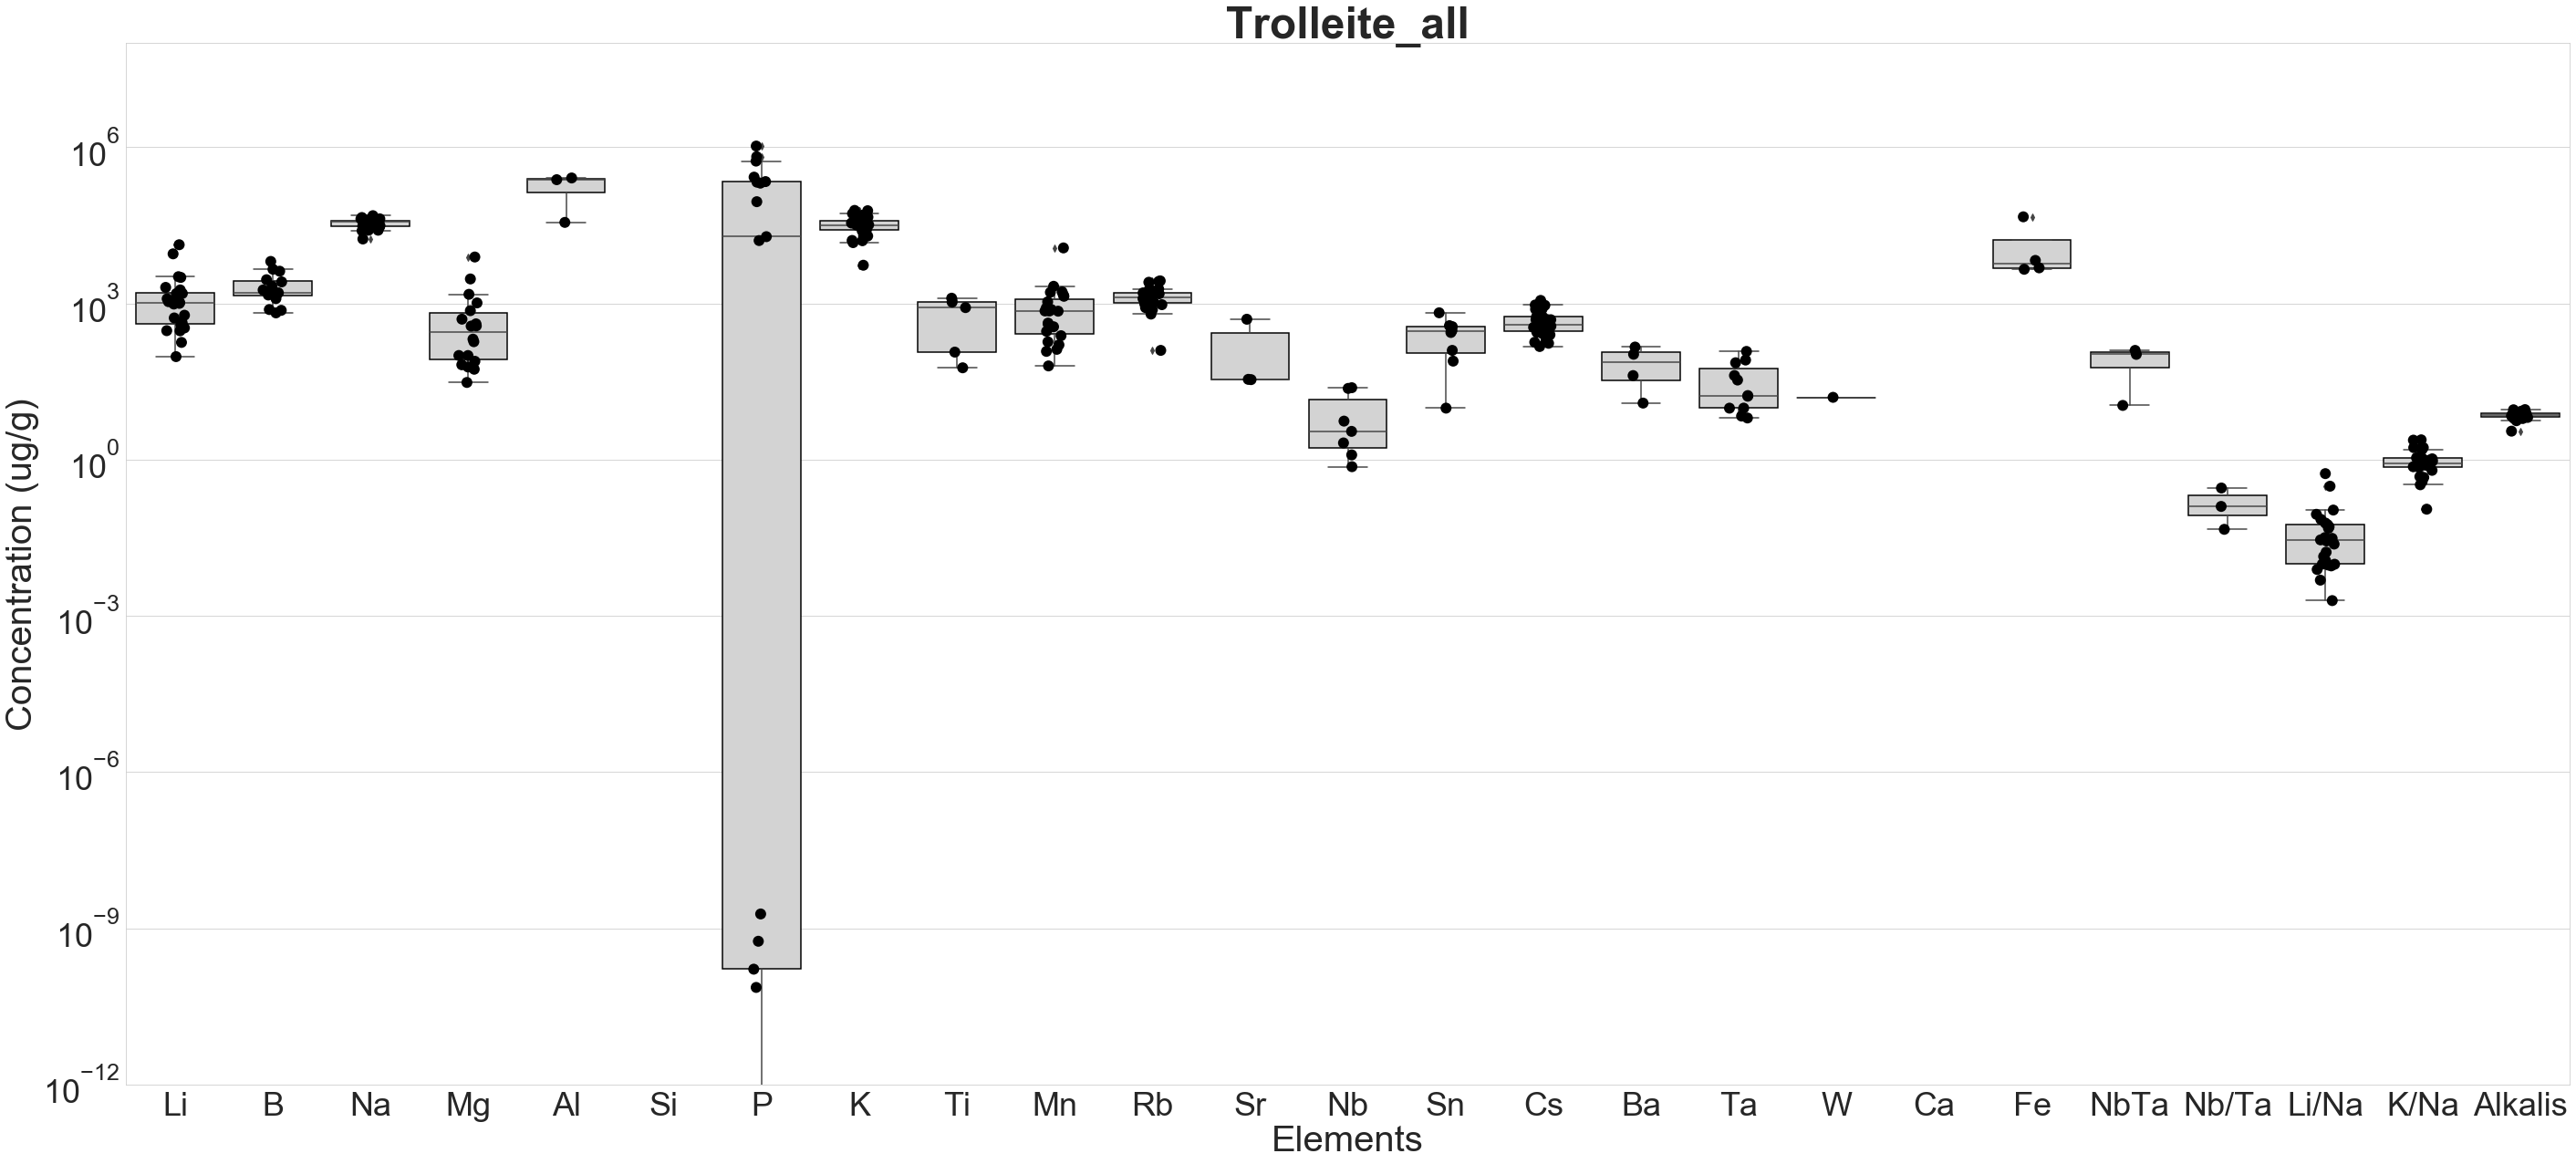

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

df_plot = df_trl.copy()

# df_plot = df_aug.query('sample == "BU18FA19(2)"')


host_list = ['wyllieite', 'trolleite', 'bertossaite', 'augelite', 
             'brazilianite', 'quartz']

elem_list = ['Li', 'B', 'Na', 'Mg',
       'Al', 'Si', 'P', 'K', 'Ti', 'Mn', 'Rb',
       'Sr', 'Nb', 'Sn', 'Cs', 'Ba', 'Ta', 'W', 'Ca', 'Fe', 'NbTa', 'Nb/Ta',
       'Li/Na', 'K/Na', 'Alkalis']

fig = plt.figure(figsize =(48, 21))

# fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16,5))

sns.set_style("whitegrid")


# Histogram + kernel density function curve

# ax = sns.displot(df_plot, x="K%", hue="Host", multiple='stack', kde=True)#col="Host"
# sns.kdeplot(data=df_plot, x="K", hue="Host")




# Boxplot + data on top

x = df_plot.columns
# y = 'B'

ax = sns.boxplot(data=df_plot, showfliers = True, order = elem_list)
# ax = sns.violinplot(x=x, y=y, data=df_plot, showfliers = False, hue="sample")
ax = sns.stripplot(data=df_plot, color=".0", order = elem_list, size=12, jitter=True)
ax.set(yscale="log")

for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    box.set_facecolor('lightgrey')



# # Binary distribution map

# sns.displot(df_plot, x="K%", y="Na%", hue="Host", kind="kde")




# # Binary scatter plot 

# sns.scatterplot(data=df_plot, x="K%", y="Na%", hue="Host")
# ax.set_xlim([0, 12.5])




# Mixed plots

# plot = sns.jointplot(data=df_plot, x="K%", y="B%", hue="Host")

# plot.ax_marg_x.set_xlim(-2.5, 7.5)
# ax.set_ylim(0.001, 30000)



# Add artistic features to graph
plt.title('Trolleite_all', fontsize=48, fontname="Arial",fontweight="bold")
plt.xlabel('Elements', fontsize=40)
plt.ylabel('Concentration (ug/g)', fontsize=40)


plt.xticks(fontsize=36)
plt.yticks(fontsize=36)

ax.set_ylim(0.000000000001, 100000000)

plt.savefig(base_dir+'Boxplot_Trl_all.svg')
plt.show()

   

# Things to do in the code:

#### 1. Figure out a way to easily illustrate the processes